##

### Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

### Carregando dados

In [2]:
dados = pd.read_csv('processamento_de_dados/resultado.csv')
print(dados.head())

   comprimento corpo  largura corpo  comprimento flagelo  largura flagelo  \
0                4.6            3.2                  1.4              0.2   
1                5.9            3.0                  4.2              1.5   
2                7.7            2.8                  6.7              2.0   
3                5.2            3.5                  1.5              0.2   
4                5.0            3.3                  1.4              0.2   

   Tipo  proporcao corpo  proporcao flagelo  
0     1         1.437500               7.00  
1     2         1.966667               2.80  
2     3         2.750000               3.35  
3     1         1.485714               7.50  
4     1         1.515152               7.00  


### Criando duas novas feactures

In [3]:
dados['Volume corpo'] = np.array(dados['comprimento corpo'])*np.pi*np.array(dados['largura corpo'])**2
dados['Volume flagelo'] = np.array(dados['comprimento flagelo'])*np.pi*np.array(dados['largura flagelo'])**2

### Plotando Feactures

#### Redução de dimensão pelo T-SNE

Importando biblioteca para o T-SNE

In [4]:
import sklearn.manifold as skm

Carregando dados T-SNE e retirando Label

In [5]:
data_tsne= dados.copy()

#deletando label
del data_tsne['Tipo']

Reduzindo para 2 dimensões com T-SNE

In [6]:
tsne = skm.TSNE(n_components=2,random_state=0)
reducao = tsne.fit_transform(data_tsne)

Plotando com T-SNE

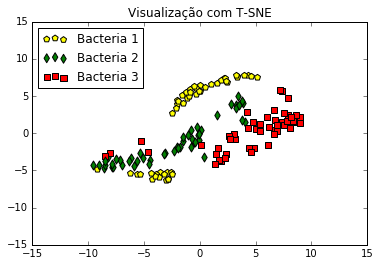

In [7]:
#Mapa das cores de cada classe
color={3:'red', 1:'yellow',2:'green'}

#Marcadores de cada classe (identidade visual)
marcadores={3:'s',2:'d',1:'p'}

#array dos labels de cada classe
target = np.asarray(dados['Tipo'])



#Setando título e plotando cada pixel com cor e marcador mapeado
plt.figure()
plt.title("Visualização com T-SNE")

for cl in range(0,dados['comprimento corpo'].size):
        cor = color[target[cl]]
        mark=marcadores[target[cl]]
        plt.scatter(reducao[cl,0],reducao[cl,1],c=cor,marker=mark,s=40)
        
plt.xlim([-15,15])
plt.ylim([-15,15])
        
#plotando legenda
plt.legend(['Bacteria 1','Bacteria 2', 'Bacteria 3'],loc='upper left')

plt.show()

Essa plotagem mostra todas as feactures, agora vamos tentar descobrir apenas as que importa para o nosso problema

### Análise gráfica de feacture

Vamos escrever uma função que receberar o target e nossas feactures plotando o gráfico

In [8]:
def plotagem(x,y,target):
    
    col1 = np.asarray(x)
    col2 = np.asarray(y)
    target= np.asarray(target)
    
    mapa={1:'yellow',2:'green',3:'red'}
    
    plt.legend(['Bacteria 1','Bacteria 2','Bacteria3'])
    
    for i in range(col1.size):
        plt.scatter(col1[i],col2[i],c=mapa[target[i]])
    plt.show()

#### Comprimento Corpo X Largura Corpo

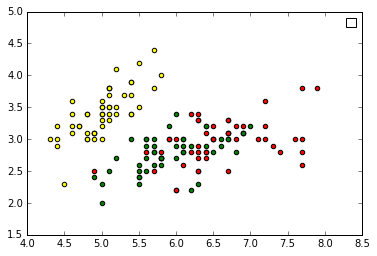

In [9]:
plotagem(dados['comprimento corpo'],dados['largura corpo'],dados['Tipo'])


#### Comprimento Flagelo X Largura Flagelo

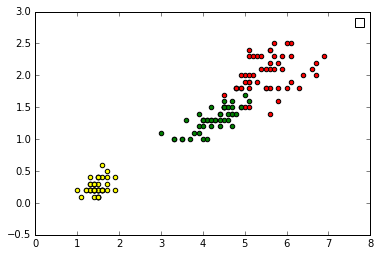

In [10]:
plotagem(dados['comprimento flagelo'],dados['largura flagelo'],dados['Tipo'])

#### Volume Corpo X Volume Flagelo

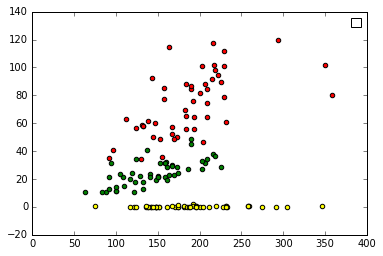

In [11]:
plotagem(dados['Volume corpo'], dados['Volume flagelo'],dados['Tipo'])

#### Proporção Corpo X Proporção Flagelo

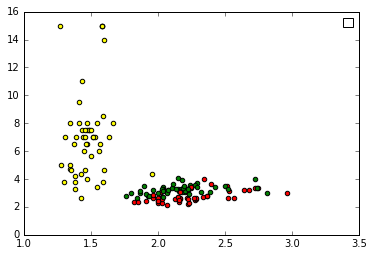

In [12]:
plotagem(dados['proporcao corpo'],dados['proporcao flagelo'], dados['Tipo'])

#### Refletindo um pouco sobre essas feactures vamos plotar o T-SNE das mais dispersas 

Vamos utilizar a mesma implementação do inicio

In [13]:
data2_tsne = dados.copy()

#deletando label
del data2_tsne['Tipo']

#deletando feactures que não utilizaremos
del data2_tsne['proporcao corpo']
del data2_tsne['proporcao flagelo']


tsne2= skm.TSNE(n_components=2, random_state=0)

reducao2= tsne2.fit_transform(data2_tsne)

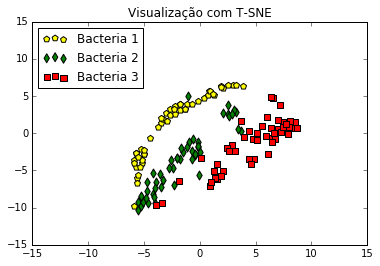

In [14]:
#Mapa das cores de cada classe
color={3:'red', 1:'yellow',2:'green'}

#Marcadores de cada classe (identidade visual)
marcadores={3:'s',2:'d',1:'p'}

#array dos labels de cada classe
target = np.asarray(dados['Tipo'])

#Setando título e plotando cada pixel com cor e marcador mapeado
plt.figure()
plt.title("Visualização com T-SNE")

for cl in range(0,dados['comprimento corpo'].size):
        cor = color[target[cl]]
        mark=marcadores[target[cl]]
        plt.scatter(reducao2[cl,0],reducao2[cl,1],c=cor,marker=mark,s=40)
        
plt.xlim([-15,15])
plt.ylim([-15,15])
#plotando legend
plt.legend(['Bacteria 1', 'Bacteria 2', 'Bacteria 3'], loc='upper left')

plt.show()